<a href="https://colab.research.google.com/github/Madhusti-D/ML-CS-5783/blob/main/Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

**Importing necessary libraries**

In [340]:
from traitlets.utils import text
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import normalize

with open("/content/test.txt") as f:
  test_text = f.read()

# To remove the spacces from the count 
without_spaces = test_text.strip()

#To have all characters in lower case or upper case, 
without_spaces_lower = without_spaces.lower()
#print(without_spaces_lower)

#Removing punctutaions like comma and period

wo_spc_low_punc = re.sub(","," ",without_spaces_lower)
#print(wo_spc_low_punc)

# Using dict{} and initializing dict{}
textDict={'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,
          'g':0,'h':0,'i':0,'j':0,'k':0,'l':0,
          'm':0,'n':0,'o':0,'p':0,'q':0,'r':0,
          's':0,'t':0,'u':0,'v':0,'w':0,'x':0,
          'y':0,'z':0,' ':0, '\n':0}
for line in wo_spc_low_punc:
  for i in line:
    if i in textDict:
      textDict[i] += 1
    else:
      textDict[i]=1

**To remove unwanted white spaces count " " from the dictionary variable**

In [341]:
del textDict[" "]


**To remove unwanted character "\n" from the dictionary variable**

In [342]:
del textDict["\n"]

In [343]:
alphabets = list(textDict.keys())
frequency = list(textDict.values())

**Normalising the frequency values**

In [344]:
norm_values = np.array(frequency)
normalized_values = normalize(np.expand_dims(norm_values,axis = 0))
print(norm_values)
normalized_values = np.transpose(normalized_values)
print(normalized_values.shape)

[44 24 23 30 63 22 23 25 56 23 22 26 22 28 50 25 22 40 25 36 38 22 22 22
 27 23]
(26, 1)


**Reshaping the normalized values**

In [345]:
type(normalized_values)
normalized_values = np.squeeze(normalized_values)


**Plotting the normalized frquency plot**

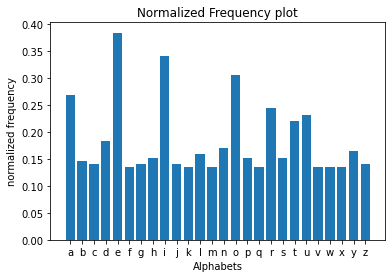

In [346]:
plt.bar(range (len(textDict)), normalized_values, tick_label=alphabets)
plt.title("Normalized Frequency plot")
plt.xlabel("Alphabets")
plt.ylabel("normalized frequency")
plt.show()

**Plotting unnormalized frequency plot**

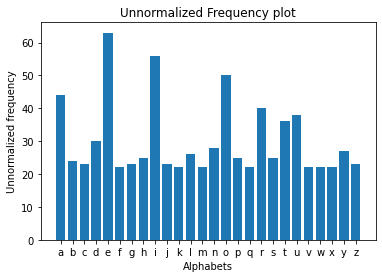

In [347]:
plt.bar(range (len(textDict)),frequency,tick_label=alphabets)
plt.title("Unnormalized Frequency plot")
plt.xlabel("Alphabets")
plt.ylabel("Unnormalized frequency")
plt.show()

# Problem 2


**Reading pixel values from the test.png image**

In [348]:
import cv2
import PIL
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread("/content/test.png")
print(type(img))
print(img.shape)
print(img.ndim)
print(img.size)

<class 'numpy.ndarray'>
(128, 128, 3)
3
49152


**Creating the 3 sets of points as an array**

In [349]:
bgr_arr = np.array([[255,0,0],[0,255,0],[0,0,255]])
bgr_arr = bgr_arr.reshape(3,1,3)

**#1 Computing Euclidean Distance**

In [350]:
output = np.empty([128,128,3])
for i in range (0,128):
  for j in range (0,128):
    #print(img[i,j,:])
    x=(np.linalg.norm(img[i,j,:]-bgr_arr[0,:,:]))
    y=(np.linalg.norm(img[i,j,:]-bgr_arr[1,:,:]))
    z=(np.linalg.norm(img[i,j,:]-bgr_arr[2,:,:]))
    #print ('x=',x,'y= ',y, 'z= ',z)
    dist_arr = np.array([x,y,z])
    index = np.argmin(dist_arr)
    #print(index)
    output[i,j] = bgr_arr[index,:,:]

**#1 Plotting the output and saving it as**

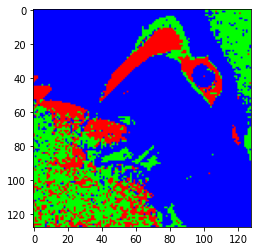

In [351]:
import matplotlib.pyplot as plt
plt.imshow(output , cmap = "gray")
plt.savefig("output1.png")

**#2 Marking the center of the image with a square and saving output image as output2.png**

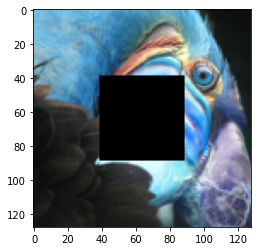

In [352]:
for i in range(39,89):
  for j in range (39,89):
    img[i,j,:]=[0,0,0]
plt.imshow(img,cmap="gray")
Image.fromarray(img, 'RGB').save("output2.png")

# Problem 3


**Solving system of equations**

In [353]:
import numpy as np

Coefficient_mat = np.array( [[3 , 3],
                            [4 , 2]])

cost = np.array([11.25, 10])

each_dish = np.linalg.solve(Coefficient_mat,cost)

soft_tacos = each_dish[0]
burritos = each_dish[1]

print("The cost of one soft taco is", soft_tacos,"$")
print("The cost of one burrito is", burritos,"$")


The cost of one soft taco is 1.25 $
The cost of one burrito is 2.5 $
